In [19]:
from langgraph.graph import StateGraph ,START, END
from typing import TypedDict

In [20]:
# Define the State 

class BMIState(TypedDict):
    height: float
    weight: float
    label: str
    bmi: float

In [21]:
def calculate_bmi(state: BMIState) -> BMIState:
    state["bmi"] = state["weight"] / (state["height"] ** 2)
    return state


In [22]:
def label_BMI(state: BMIState) -> BMIState:
    if state["bmi"] < 18.5:
        state["label"] = "Underweight"
    elif state["bmi"] >= 18.5 and state["bmi"] < 25:
        state["label"] = "Normal"
    else:
        state["label"] = "Overweight"
    return state


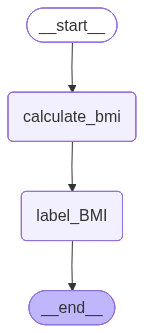

In [23]:
# define the graph 
graph = StateGraph(BMIState)

# add nodes to the graph 
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("label_BMI", label_BMI)

# add edges to the graph 
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_BMI")
graph.add_edge("label_BMI", END)

# compile the graph 
workflow = graph.compile()
workflow

In [24]:
# execute the graph 
initial_state = {"height": 1.75, "weight": 70}
final_state = workflow.invoke(initial_state)
final_state

{'height': 1.75, 'weight': 70, 'label': 'Normal', 'bmi': 22.857142857142858}